In [2]:
import pandas as pd

df= pd.read_csv('MTA_NYCT_Subway_Elevator_data.csv')
df.head()

,Month,Borough,Equipment Type,Equipment Code,Total Outages,Scheduled Outages,Unscheduled Outages,Entrapments,Time Since Major Improvement,AM Peak Availability,...,PM Peak Availability,PM Peak Hours Available,PM Peak Total Hours,24-Hour Availability,24-Hour Hours Available,24-Hour Total Hours,Station Name,Station MRN,Station Complex Name,Station Complex MRN
0,01/01/2015,Queens,Elevator,EL426,2,2,0,0,95.0,1.000000,...,1.000000,124.000000,124.0,0.986022,733.600000,744.0,JUNCTIONBLVD-FLS-7,451,Junction Blvd - Station,451
1,01/01/2015,Queens,Elevator,EL411,6,5,1,0,313.0,0.984677,...,0.981586,121.716667,124.0,0.962522,716.116667,744.0,SUTPHINBLVD-ARCHERAV-JFKAIRPORT-QBL-E/J/Z,279,Sutphin Blvd-Archer Av-JFK Airport - Station,279
2,01/01/2015,Brooklyn,Escalator,ES332,16,3,13,0,1039.0,0.958199,...,0.903360,112.016667,124.0,0.932684,693.916667,744.0,MYRTLE-WYCKOFFAVS-MYT-M,112,"Myrtle-Wyckoff Avs (L,M)",630
3,01/01/2015,Queens,Elevator,EL449X,0,0,0,0,NaN,1.000000,...,1.000000,124.000000,124.0,1.000000,744.000000,744.0,SUTPHINBLVD-ARCHERAV-JFKAIRPORT-QBL-E/J/Z,279,Sutphin Blvd-Archer Av-JFK Airport - Station,279
4,01/01/2015,Manhattan,Escalator,ES239,7,3,4,0,655.0,0.978898,...,0.973790,120.750000,124.0,0.964315,717.450000,744.0,5AV/53ST-QBL-E/M,276,5 Av/53 St - Station,276


In [17]:
df= df[df['Equipment Type']=='Elevator']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39841 entries, 0 to 73466
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Month                         39841 non-null  datetime64[ns]
 1   Borough                       39841 non-null  object        
 2   Equipment Type                39841 non-null  object        
 3   Equipment Code                39841 non-null  object        
 4   Total Outages                 39841 non-null  int64         
 5   Scheduled Outages             39841 non-null  int64         
 6   Unscheduled Outages           39841 non-null  int64         
 7   Entrapments                   39841 non-null  int64         
 8   Time Since Major Improvement  34311 non-null  float64       
 9   AM Peak Availability          38714 non-null  float64       
 10  AM Peak Hours Available       39841 non-null  float64       
 11  AM Peak Total Hours           398

In [19]:
df['Month']= pd.to_datetime(df['Month'])

In [20]:
df.groupby('Month')['Total Outages'].sum()

Month
2015-01-01     922
2015-02-01     907
2015-03-01    1079
2015-04-01     966
2015-05-01     893
              ... 
2025-02-01    1132
2025-03-01    1100
2025-04-01    1051
2025-05-01     969
2025-06-01    1135
Name: Total Outages, Length: 126, dtype: int64

In [21]:
monthly_unscheduled = df.groupby('Month')['Unscheduled Outages'].sum().to_frame()

In [22]:
df_monthly = df.groupby('Month')['Total Outages'].sum().to_frame()
df_monthly['Unscheduled'] = monthly_unscheduled['Unscheduled Outages']
df_monthly

,Total Outages,Unscheduled
Month,,
2015-01-01,922,459
2015-02-01,907,457
2015-03-01,1079,499
2015-04-01,966,411
2015-05-01,893,402
...,...,...
2025-02-01,1132,599
2025-03-01,1100,550
2025-04-01,1051,510


In [27]:
df_monthly['unscheduled_percent'] = df_monthly['Unscheduled']/df_monthly['Total Outages'] *100
df_monthly.head()

,Total Outages,Unscheduled,unscheduled_percent
Month,,,
2015-01-01,922,459,49.783080
2015-02-01,907,457,50.385888
2015-03-01,1079,499,46.246525
2015-04-01,966,411,42.546584
2015-05-01,893,402,45.016797


<Axes: xlabel='Month'>

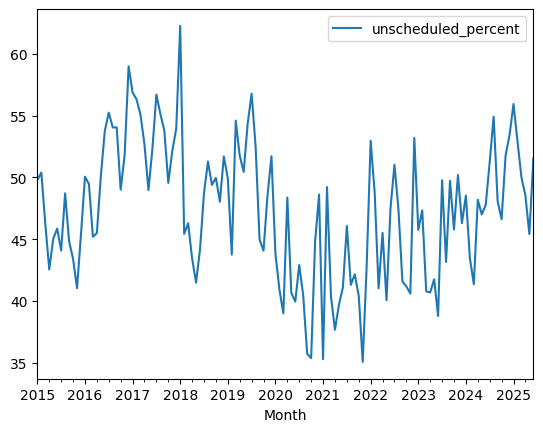

In [24]:
df_monthly.plot( y="unscheduled_percent")

In [25]:
df_monthly['unscheduled_percent'].mean()

np.float64(47.321095157448575)